In [1]:
import numpy as np
import matplotlib.pyplot as plt

import qnmfits

In [2]:
sim = qnmfits.SXS(305, zero_time=(4,4))

Skipping download from 'https://data.black-holes.org/catalog.json' because local file is newer
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/metadata.json
Found the following files to load from the SXS catalog:
    SXS:BBH:0305v5/Lev6/rhOverM_Asymptotic_GeometricUnits_CoM.h5


In [3]:
t0_list = [0, 5, 10, 15, 20]

amps = []
mms = []

for t0 in t0_list:
    result = qnmfits.ringdown_fit(
        sim.times,
        sim.h[4,4],
        modes=[(4,4,0,1),(4,4,1,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=t0,
        T=90
    )
    
    amps.append(result['C'])
    mms.append(result['mismatch'])

t0_list = np.array(t0_list)
amps = np.array(amps)
mms = np.array(mms)

In [4]:
for t0, amp, mm in zip(t0_list, amps, mms):
    print(f'{t0}\t{amp[0]:.5f}\t{amp[1]:.5f}\t{1-mm:.5f}')

0	0.04002-0.00312j	-0.07291-0.01980j	0.83275
5	0.01551+0.02633j	0.00496-0.04899j	0.96516
10	-0.00373+0.01748j	0.02039-0.00779j	0.99309
15	-0.00639+0.00749j	0.00672+0.00451j	0.99791
20	-0.00479+0.00265j	0.00006+0.00289j	0.99913


In [36]:
result_0 = qnmfits.ringdown_fit(
    sim.times,
    sim.h[4,4],
    modes=[(4,4,0,1),(4,4,1,1)],
    Mf=sim.Mf,
    chif=sim.chif_mag,
    t0=0,
    T=90
)

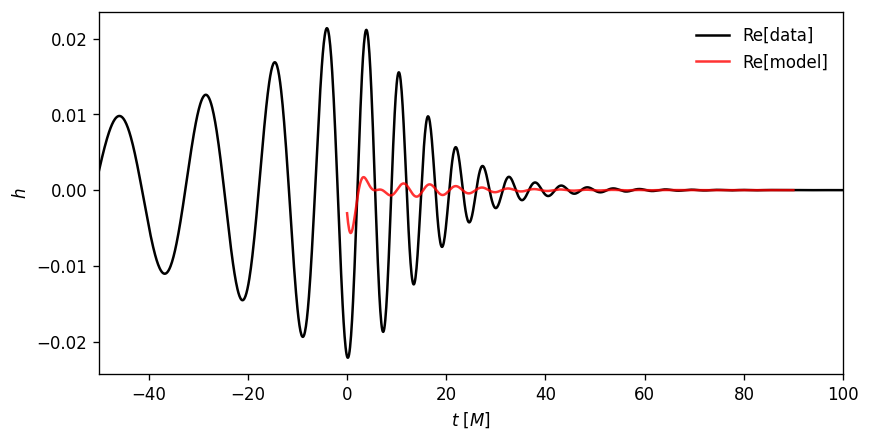

In [37]:
qnmfits.plot_ringdown(sim.times, sim.h[4,4], best_fit=result_0, fig_kw={'dpi':120}) # , outfile='fig1.png')

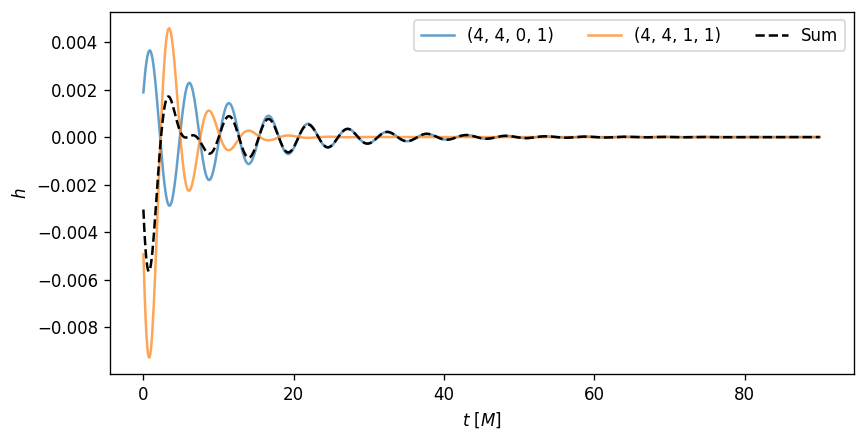

In [38]:
qnmfits.plot_ringdown_modes(result_0, fig_kw={'dpi':120}) # , outfile='fig2.png')

In [27]:
t0_array = np.linspace(0, 20)

amps = []
for t0 in t0_array:
    result = qnmfits.ringdown_fit(
        sim.times,
        sim.h[4,4],
        modes=[(4,4,0,1),(4,4,1,1)],
        Mf=sim.Mf,
        chif=sim.chif_mag,
        t0=t0,
        T=90
    )
    
    amps.append(result['C'][0])
    
amps = np.array(amps)

Text(0, 0.5, '$\\mathrm{Im}[C_{4 4 0}]$')

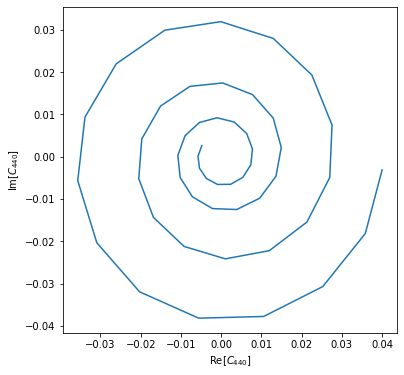

In [28]:
fig, ax = plt.subplots(figsize=(6,6))

ax.plot(np.real(amps), np.imag(amps))

ax.set_xlabel('$\mathrm{Re}[C_{4 4 0}]$')
ax.set_ylabel('$\mathrm{Im}[C_{4 4 0}]$')

# ax.set_xlim(0, 0.04)

# fig.savefig('fig3.png', dpi=120)

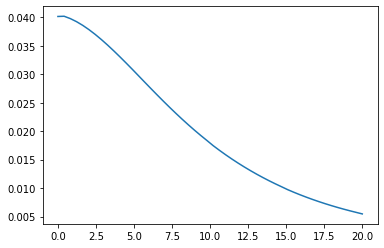

In [29]:
fig, ax = plt.subplots()
ax.plot(t0_array, abs(amps))